In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
heart_data = pd.read_csv('../heart_disease - heart_disease.csv')
heart_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
statistics = heart_data.describe()
statistics

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319789.000000,319778.000000,319781.000000,319576.000000
mean,28.325348,3.371605,3.898384,7.096922
std,6.356134,7.950662,7.955291,1.436165
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [6]:
all_statistics = heart_data.describe(include='all')
all_statistics

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319789.000000,319721,319680,319774,319778.000000,319781.000000,319762,319482,319751,319756,319762,319779,319302,319576.000000,319795,319778,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187843,297908,307706,NaN,NaN,275363,167591,34143,245189,269626,247946,113657,NaN,276923,308001,289976
mean,NaN,28.325348,NaN,NaN,NaN,3.371605,3.898384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.096922,NaN,NaN,NaN
std,NaN,6.356134,NaN,NaN,NaN,7.950662,7.955291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436165,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [7]:
missing_data = heart_data.isnull().sum()
missing_data

HeartDisease          0
BMI                   6
Smoking              74
AlcoholDrinking     115
Stroke               21
PhysicalHealth       17
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           493
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [8]:
heart_data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [9]:
BMI_median = heart_data['BMI'].median()
print(BMI_median)


27.34


In [10]:
heart_data['BMI'].fillna(BMI_median, inplace=True)

In [11]:
PhysicalHealth_median = heart_data['PhysicalHealth'].median()
PhysicalHealth_median

0.0

In [12]:
heart_data['PhysicalHealth'].fillna(PhysicalHealth_median, inplace=True)
heart_data['PhysicalHealth'].isna().sum()

0

In [13]:
heart_data['MentalHealth']

0         30.0
1          0.0
2         30.0
3          0.0
4          0.0
          ... 
319790     0.0
319791     0.0
319792     0.0
319793     0.0
319794     0.0
Name: MentalHealth, Length: 319795, dtype: float64

In [14]:
MentalHealth_median = heart_data['MentalHealth'].median()
MentalHealth_median

0.0

In [15]:
heart_data['MentalHealth'].fillna(MentalHealth_median, inplace=True)
heart_data['MentalHealth'].isna().sum()

0

In [16]:
sleeptime_median = heart_data['SleepTime'].median()
sleeptime_median

7.0

In [17]:
heart_data['SleepTime'].fillna(sleeptime_median, inplace=True)
heart_data['SleepTime'].isna().sum()

0

In [18]:
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 
                       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
categorical_columns

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [19]:
for column in categorical_columns:
    heart_data[column].fillna(heart_data[column].mode()[0], inplace=True)

In [20]:
heart_data.isnull().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [21]:
heart_disease_counts = heart_data['HeartDisease'].value_counts()
heart_disease_counts

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [22]:
for column in categorical_columns:
    le = LabelEncoder()
    heart_data[column + 'ENC'] = le.fit_transform(heart_data[column])


In [23]:
heart_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,DiffWalkingENC,SexENC,AgeCategoryENC,RaceENC,DiabeticENC,PhysicalActivityENC,GenHealthENC,AsthmaENC,KidneyDiseaseENC,SkinCancerENC
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,0,0,7,5,2,1,4,1,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,0,0,12,5,0,1,4,0,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,0,1,9,5,2,1,1,1,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,0,0,11,5,0,0,2,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,1,0,4,5,0,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,1,1,8,3,2,0,1,1,0,0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,0,1,3,3,0,1,4,1,0,0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,0,0,5,3,0,1,2,0,0,0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,0,0,1,3,0,0,2,0,0,0


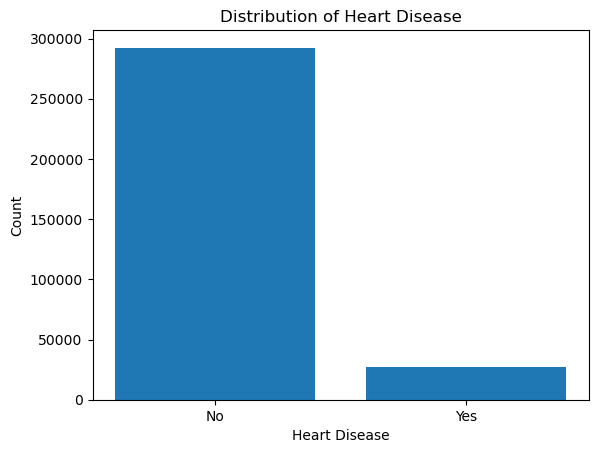

In [24]:
plt.bar(heart_disease_counts.index, heart_disease_counts.values)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

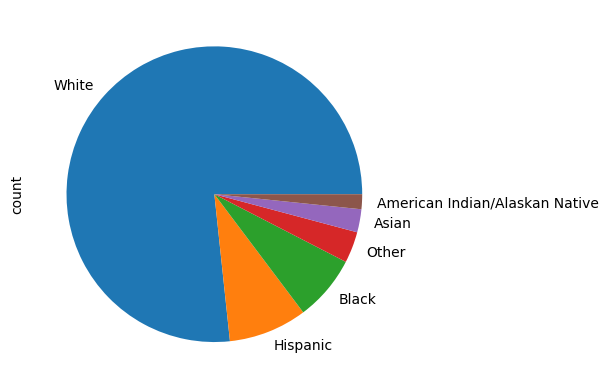

In [25]:
heart_data['Race'].value_counts().plot.pie()

<Axes: ylabel='count'>

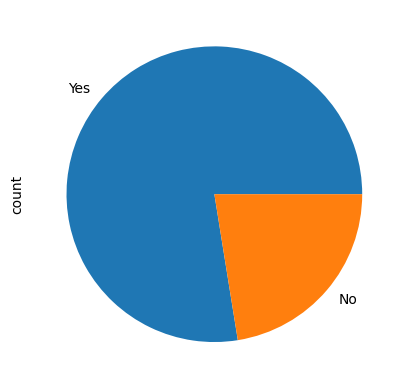

In [26]:
heart_data['PhysicalActivity'].value_counts().plot.pie()


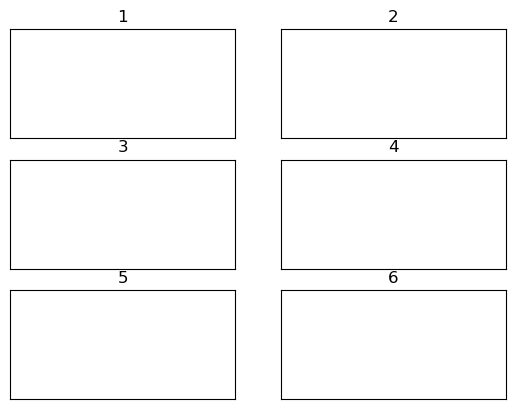

In [29]:
plt.figure()
for i in range(1,7):
    plt.subplot(3,2,i)
    plt.title(i)
    plt.xticks([])
    plt.yticks([])

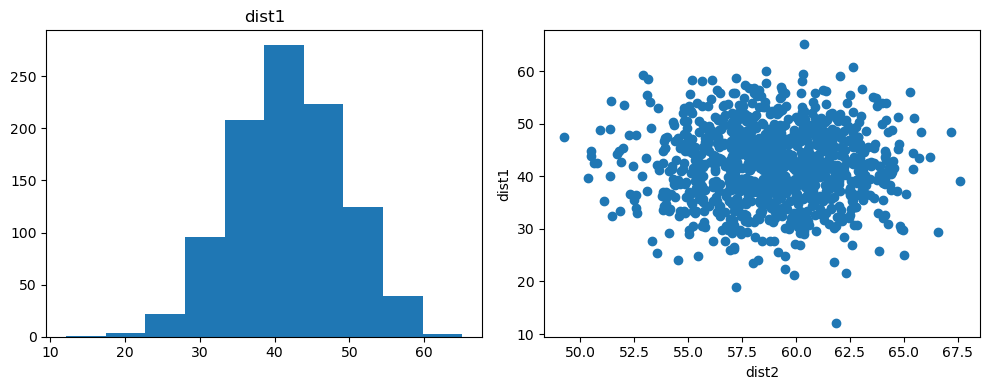

In [36]:
dist1 = np.random.normal(42,7,1000)
dist2 = np.random.normal(59,3,1000)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(dist1)
plt.title('dist1')

plt.subplot(1,2,2)
plt.scatter(dist2,dist1)
plt.xlabel('dist2')
plt.ylabel('dist1')

plt.tight_layout()

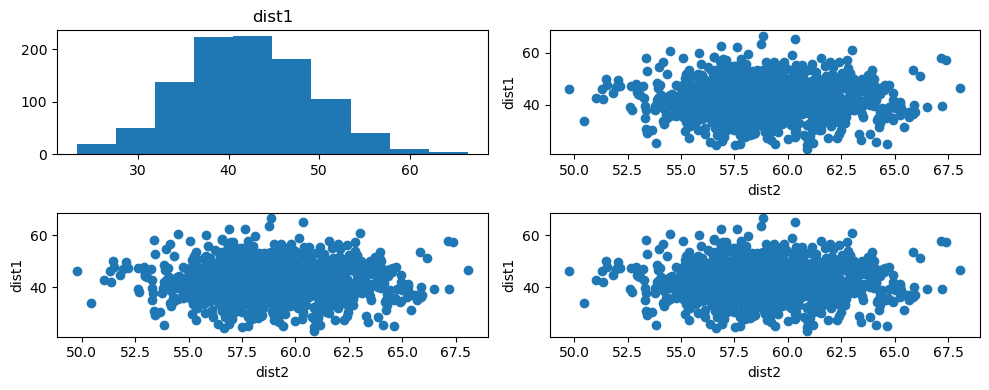

In [59]:
dist1 = np.random.normal(42,7,1000)
dist2 = np.random.normal(59,3,1000)

plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
plt.hist(dist1)
plt.title('dist1')

plt.subplot(2,2,2)
plt.scatter(dist2,dist1)
plt.xlabel('dist2')
plt.ylabel('dist1')

plt.subplot(2,2,3)
plt.scatter(dist2,dist1)
plt.xlabel('dist2')
plt.ylabel('dist1')

plt.subplot(2,2,4)
plt.scatter(dist2,dist1)
plt.xlabel('dist2')
plt.ylabel('dist1')

plt.tight_layout()